In [283]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [284]:
def read_df(file_path):
    df = pd.read_csv(file_path)
    # print("Shape of ", file_path ,": (", rows_train,', ', columns_train, ')')
    return df
house_train = read_df('https://raw.githubusercontent.com/NirmalSankalana/housing_prices_analyse/main/train.csv')
house_test = read_df('https://raw.githubusercontent.com/NirmalSankalana/housing-prices-analyse/main/test.csv')

Shape of  https://raw.githubusercontent.com/NirmalSankalana/housing_prices_analyse/main/train.csv : ( 1460 ,  81 )
Shape of  https://raw.githubusercontent.com/NirmalSankalana/housing-prices-analyse/main/test.csv : ( 1460 ,  81 )


In [285]:
house_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [286]:
house_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [287]:
def drop_duplicates(df):
    print('No of duplicates: ' + str(df.duplicated().sum()))
    df.Id.drop_duplicates()
    df = df.drop_duplicates()
    df = df.drop(columns=['Id'])

In [288]:
drop_duplicates(house_train)
drop_duplicates(house_test)

No of duplicates: 0
No of duplicates: 0


In [289]:
def d_types_report(house_train):
    columns=[]
    d_types=[]
    uniques=[]
    n_uniques=[]
    null_values=[]
    null_values_percentage=[]
    
    for i in house_train.columns:
        columns.append(i)
        d_types.append(house_train[i].dtypes)
        uniques.append(house_train[i].unique()[:5])
        n_uniques.append(house_train[i].nunique())
        null_values.append(house_train[i].isna().sum())
        null_values_percentage.append(null_values[-1] * 100 / house_train.shape[0])

    return pd.DataFrame({"Columns": columns, "Data_Types": d_types, "Unique_values": uniques, "N_Uniques": n_uniques,  "Null_Values": null_values, "Null_Values_percentage": null_values_percentage})
report_train = d_types_report(house_train)
report_test = d_types_report(house_test)

In [290]:
train_numerical_columns = report_train[report_train['Data_Types'] != "object"]
train_numerical_columns_list = train_numerical_columns['Columns'].to_list()
test_numerical_columns = report_test[report_test['Data_Types'] != "object"]
test_numerical_columns_list = test_numerical_columns['Columns'].to_list()

In [291]:
report_train_null = report_train[report_train['Null_Values'] > 0]
report_train_null

,Columns,Data_Types,Unique_values,N_Uniques,Null_Values,Null_Values_percentage
3,LotFrontage,float64,"[65.0, 80.0, 68.0, 60.0, 84.0]",110,259,17.739726
6,Alley,object,"[nan, Grvl, Pave]",2,1369,93.767123
25,MasVnrType,object,"[BrkFace, None, Stone, BrkCmn, nan]",4,8,0.547945
26,MasVnrArea,float64,"[196.0, 0.0, 162.0, 350.0, 186.0]",327,8,0.547945
30,BsmtQual,object,"[Gd, TA, Ex, nan, Fa]",4,37,2.534247
31,BsmtCond,object,"[TA, Gd, nan, Fa, Po]",4,37,2.534247
32,BsmtExposure,object,"[No, Gd, Mn, Av, nan]",4,38,2.602740
33,BsmtFinType1,object,"[GLQ, ALQ, Unf, Rec, BLQ]",6,37,2.534247
35,BsmtFinType2,object,"[Unf, BLQ, nan, ALQ, Rec]",6,38,2.602740
42,Electrical,object,"[SBrkr, FuseF, FuseA, FuseP, Mix]",5,1,0.068493


In [292]:
report_test_null = report_test[report_test['Null_Values'] > 0]
report_test_null

,Columns,Data_Types,Unique_values,N_Uniques,Null_Values,Null_Values_percentage
2,MSZoning,object,"[RH, RL, RM, FV, C (all)]",5,4,0.274160
3,LotFrontage,float64,"[80.0, 81.0, 74.0, 78.0, 43.0]",115,227,15.558602
6,Alley,object,"[nan, Pave, Grvl]",2,1352,92.666210
9,Utilities,object,"[AllPub, nan]",1,2,0.137080
23,Exterior1st,object,"[VinylSd, Wd Sdng, HdBoard, Plywood, MetalSd]",13,1,0.068540
24,Exterior2nd,object,"[VinylSd, Wd Sdng, HdBoard, Plywood, MetalSd]",15,1,0.068540
25,MasVnrType,object,"[None, BrkFace, Stone, BrkCmn, nan]",4,16,1.096642
26,MasVnrArea,float64,"[0.0, 108.0, 20.0, 504.0, 492.0]",303,15,1.028101
30,BsmtQual,object,"[TA, Gd, Ex, Fa, nan]",4,44,3.015764
31,BsmtCond,object,"[TA, Po, Fa, Gd, nan]",4,45,3.084304


### Imputing Missing Values
in some columns missing value perscentage is very high(>80%), So we can drop these columns
1. MiscFeature
2. Fence 
3. PoolQC
4. Alley

In [293]:
report_null_75 = report_train_null[report_train_null['Null_Values_percentage'] > 75]
report_null_75_list = report_null_75['Columns'].tolist()
house_train = house_train.drop(columns=report_null_75_list)
house_test = house_test.drop(columns=report_null_75_list)
house_test.shape
house_train.shape

(1460, 77)

In [294]:
report_train_null = report_train_null[~report_train_null['Columns'].isin(report_null_75_list)]
report_test_null = report_test_null[~report_test_null['Columns'].isin(report_null_75_list)]

In [295]:
# report_knn_categorical = report_null[report_null['Data_Types'] == "object"]
# report_knn_categorical_list = report_knn_categorical['Columns'].tolist()

#### Imputing Numerical Columns

In [296]:
report_train_null_numerical = report_train_null[report_train_null['Data_Types'] != "object"]
train_null_numerical_list = report_train_null_numerical['Columns'].tolist()
report_test_null_numerical = report_test_null[report_test_null['Data_Types'] != "object"]
test_null_numerical_list = report_train_null_numerical['Columns'].tolist()
null_numerical_list = list(set(train_null_numerical_list + test_null_numerical_list))
null_numerical_list

['LotFrontage', 'GarageYrBlt', 'MasVnrArea']

In [297]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
mice_imputer = IterativeImputer()
for col in null_numerical_list:
    house_train[col] = mice_imputer.fit_transform(house_train[[col]])
    house_test[col] = mice_imputer.fit_transform(house_test[[col]])

report_train_null = report_train_null[~report_train_null['Columns'].isin(null_numerical_list)]
report_test_null = report_test_null[~report_test_null['Columns'].isin(null_numerical_list)]

#### Impute categorical columns using Mode

In [298]:
report_train_null_categorical = report_train_null[report_train_null['Data_Types'] == "object"]
report_test_null_categorical = report_test_null[report_test_null['Data_Types'] == "object"]
train_null_categorical_list = report_train_null_categorical['Columns'].tolist()
test_null_categorical_list = report_test_null_categorical['Columns'].tolist()
null_categorical_list = list(set(train_null_categorical_list + test_null_categorical_list))
null_categorical_list

['MSZoning',
 'BsmtExposure',
 'Electrical',
 'Functional',
 'GarageCond',
 'GarageFinish',
 'Exterior1st',
 'Exterior2nd',
 'FireplaceQu',
 'SaleType',
 'BsmtFinType2',
 'GarageType',
 'BsmtQual',
 'MasVnrType',
 'GarageQual',
 'BsmtCond',
 'Utilities',
 'BsmtFinType1',
 'KitchenQual']

In [299]:
for col in null_categorical_list:
    house_train[col]=house_train[col].fillna(house_train[col].mode()[0])
    house_test[col]=house_test[col].fillna(house_test[col].mode()[0])

### Handling Outliers
#### Detecting Outliers using IQR based Method

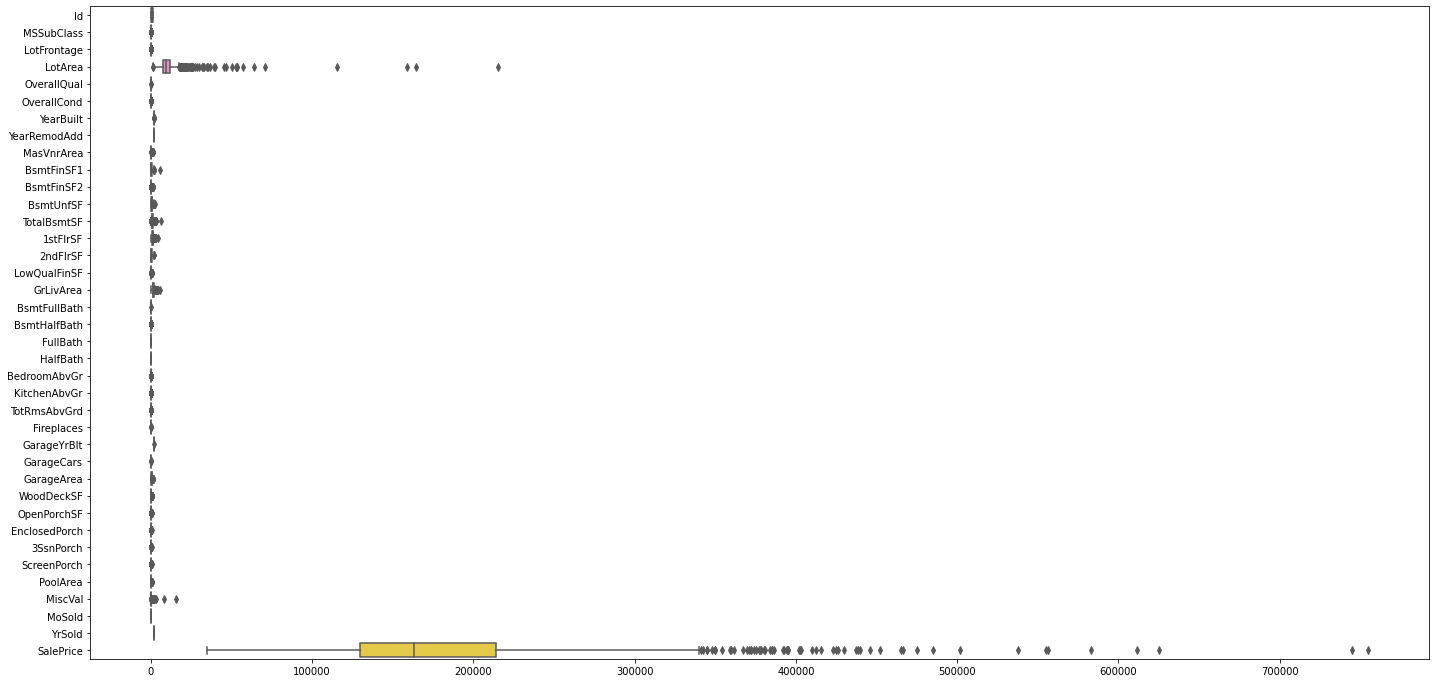

In [300]:
plt.figure(figsize=(24, 12))
ax = sns.boxplot(data=house_train, orient="h", palette="Set2")

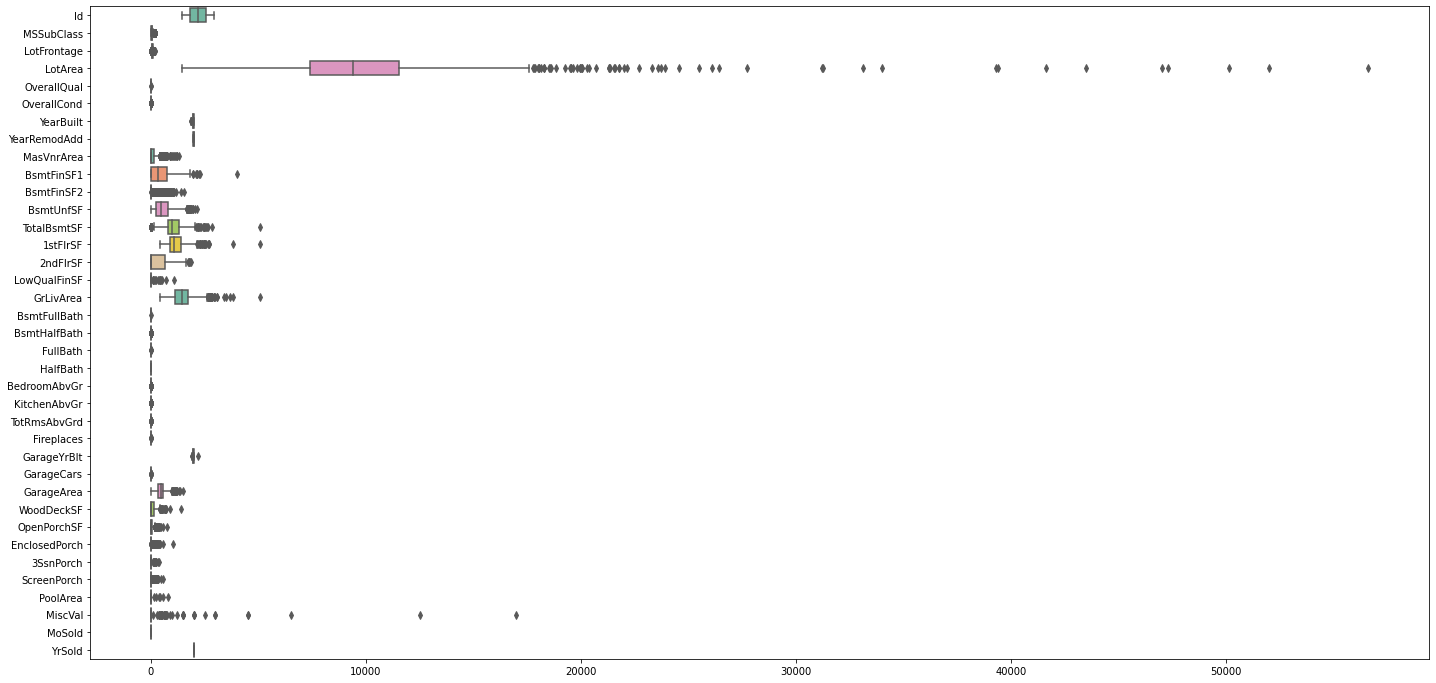

In [301]:
plt.figure(figsize=(24, 12))
ax = sns.boxplot(data=house_test, orient="h", palette="Set2")

In [302]:
def iqr_outlier_imputer(df, numerical_column_list):
    for i in numerical_column_list:
        fence = 1.5
        Q1=df[i].quantile(0.25)
        Q3=df[i].quantile(0.75)
        IQR=Q3-Q1
        Lower_Whisker = Q1-fence*IQR
        Upper_Whisker = Q3+fence*IQR
        df[i] = df[i].apply(lambda x: df[i].median() if (x > Upper_Whisker or x < Lower_Whisker)  else x)
    return df
house_train = iqr_outlier_imputer(house_train, train_numerical_columns_list)
house_test = iqr_outlier_imputer(house_test, test_numerical_columns_list)

#### Imputing outliers using z score method


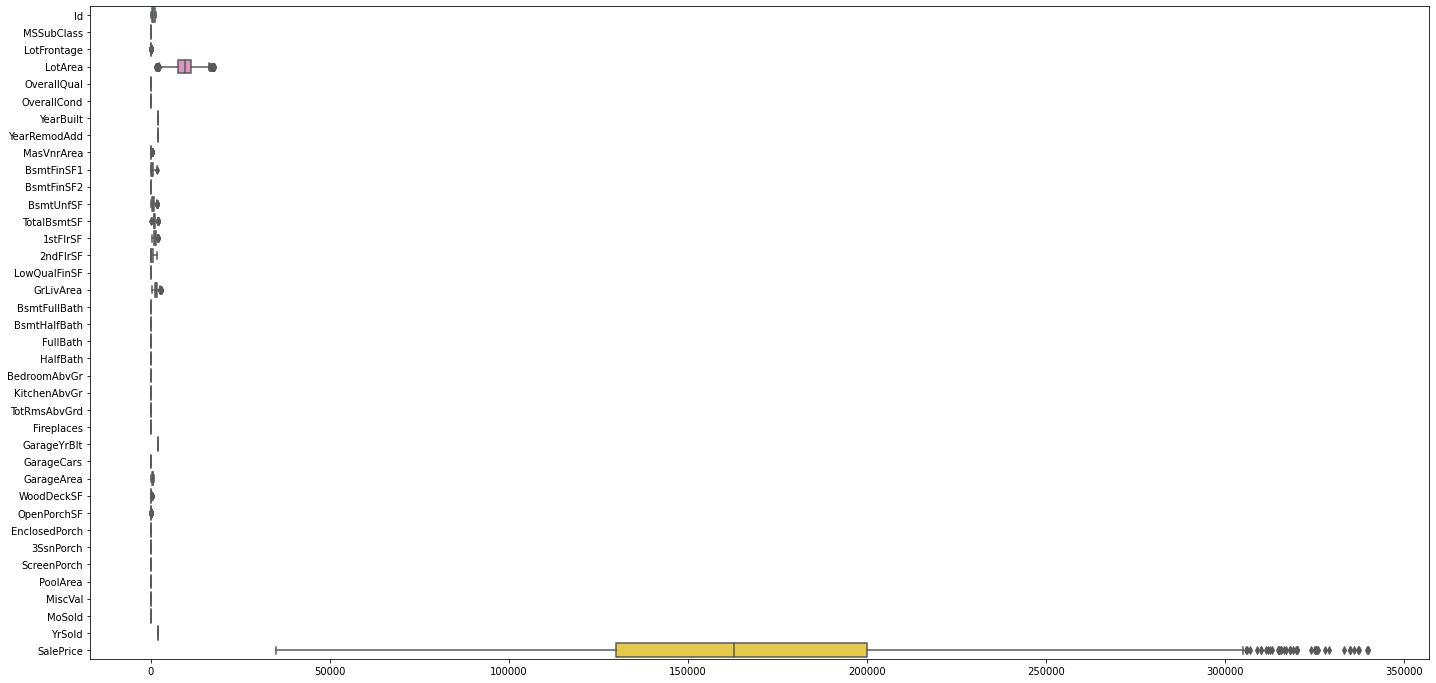

In [303]:
plt.figure(figsize=(24, 12))
ax = sns.boxplot(data=house_train, orient="h", palette="Set2")

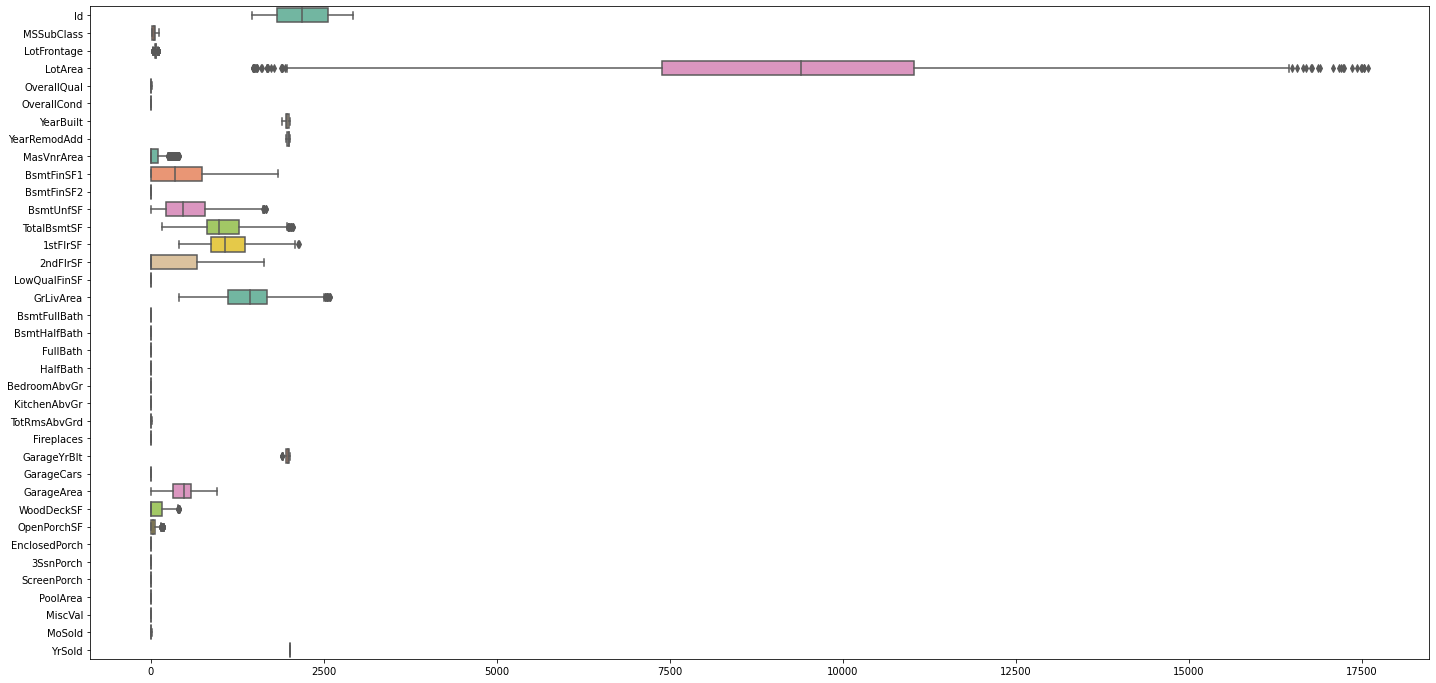

In [304]:
plt.figure(figsize=(24, 12))
ax = sns.boxplot(data=house_test, orient="h", palette="Set2")

### Data Dummies

In [318]:
encoded_house_train = pd.get_dummies(house_train)
encoded_house_test = pd.get_dummies(house_test)

In [306]:
encoded_house_train.shape

(1460, 277)

In [307]:
cor = encoded_house_train.corr()
cor_target = abs(cor["SalePrice"])
relevent_features = cor_target[cor_target > 0.4]
relevent_features

OverallQual         0.697877
YearBuilt           0.556647
YearRemodAdd        0.525288
TotalBsmtSF         0.519806
1stFlrSF            0.492049
GrLivArea           0.640551
FullBath            0.545586
TotRmsAbvGrd        0.451722
Fireplaces          0.437947
GarageYrBlt         0.463155
GarageCars          0.590731
GarageArea          0.581248
SalePrice           1.000000
ExterQual_Gd        0.571612
ExterQual_TA        0.584141
Foundation_PConc    0.502321
BsmtQual_Gd         0.407816
BsmtQual_TA         0.517039
HeatingQC_Ex        0.433236
KitchenQual_Gd      0.477138
KitchenQual_TA      0.530164
GarageFinish_Unf    0.542723
Name: SalePrice, dtype: float64

In [308]:
highly_correlated_features = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'ExterQual_Gd', 'ExterQual_TA', 'Foundation_PConc', 'BsmtQual_Gd', 'BsmtQual_TA', 'HeatingQC_Ex', 'KitchenQual_Gd', 'KitchenQual_TA', 'GarageFinish_Unf']

In [309]:
X = encoded_house_train.drop('SalePrice', 1)
y = encoded_house_train['SalePrice']

/tmp/ipykernel_11204/1177361904.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [310]:
X = X[highly_correlated_features]
X.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,...,GarageArea,ExterQual_Gd,ExterQual_TA,Foundation_PConc,BsmtQual_Gd,BsmtQual_TA,HeatingQC_Ex,KitchenQual_Gd,KitchenQual_TA,GarageFinish_Unf
0,7.0,2003.0,2003,856.0,856.0,1710.0,2,8.0,0.0,2003.0,...,548.0,1,0,1,1,0,1,1,0,0
1,6.0,1976.0,1976,1262.0,1262.0,1262.0,2,6.0,1.0,1976.0,...,460.0,0,1,0,1,0,1,0,1,0
2,7.0,2001.0,2002,920.0,920.0,1786.0,2,6.0,1.0,2001.0,...,608.0,1,0,1,1,0,1,1,0,0
3,7.0,1915.0,1970,756.0,961.0,1717.0,1,7.0,1.0,1998.0,...,642.0,0,1,0,0,1,0,1,0,1
4,8.0,2000.0,2000,1145.0,1145.0,2198.0,2,9.0,1.0,2000.0,...,836.0,1,0,1,1,0,1,1,0,0


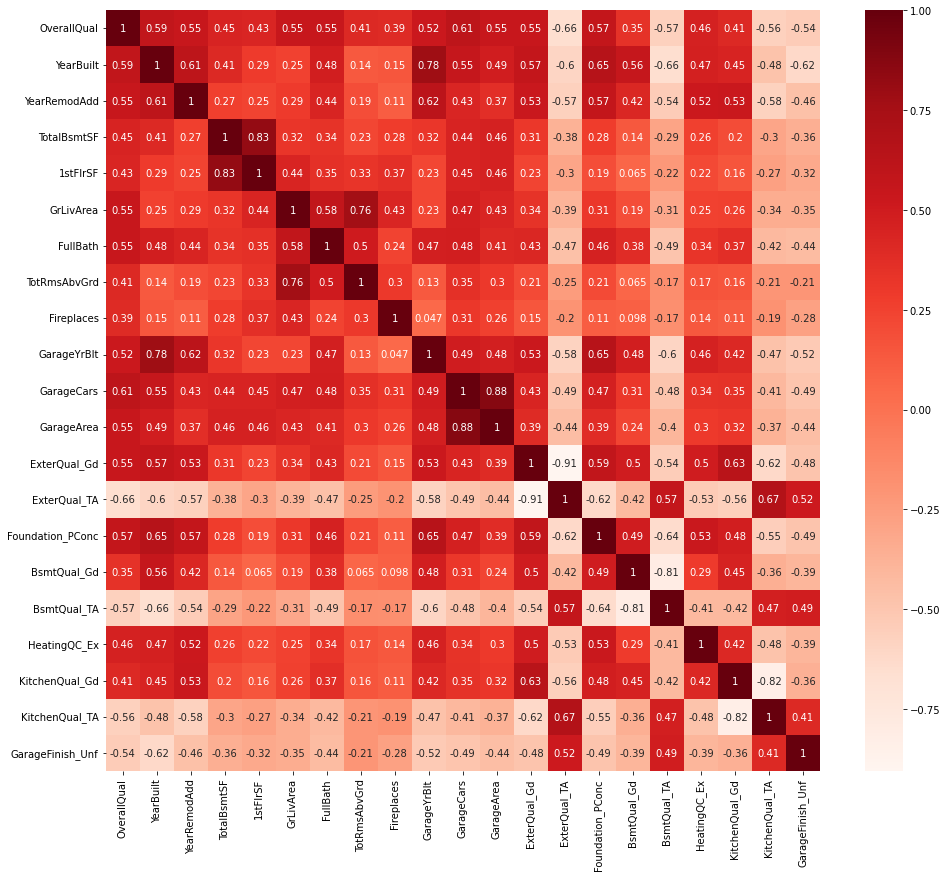

In [311]:
plt.figure(figsize=(16,14))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#### Highly correlated features with each other
1. GarageArea, GarageCars
2. ExterQual_TA, ExterQual_Gd
3. TotalBsmtSF, 1stFlrSF
4. KitchenQual_Gd, KitchenQual_TA
5. BsmtQual_Gd, BsmtQual_TA


In [312]:
selected_features = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageArea', 'ExterQual_Gd', 'Foundation_PConc', 'BsmtQual_Gd', 'HeatingQC_Ex', 'KitchenQual_Gd', 'GarageFinish_Unf']
X = X[selected_features]
X.head()
X.shape

(1460, 16)

### Modeling
#### Most Accurate Algorithms for a Regression Problem

1. Random Forest
2. Gradient Boosting Tree
3. Neural Network




In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [313]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=30)

#### 1. Random Forest Regressor

In [314]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

##### Randomized search grid

In [315]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 200, num = 11)]
max_depth.append(None)
min_samples_split = [2, 3, 4, 5, 6, 8, 10]
min_samples_leaf = [1, 2, 3, 4, 5, 6, 8, 10]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [316]:

rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 200, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)
rf_random.best_params_

In [317]:
rf_optimized = RandomForestRegressor(bootstrap= False,
 max_depth= 10,
 max_features= 'sqrt',
 min_samples_leaf= 2,
 min_samples_split= 5,
 n_estimators= 1800)

rf_optimized.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=10, max_features='sqrt',
                      min_samples_leaf=2, min_samples_split=5,
                      n_estimators=1800)